#IMPORT LIBRARIES

In [2]:
# Basic Operation
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from imblearn.over_sampling import SMOTE
from transformers import TFBertForSequenceClassification
import tensorflow as tf

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re


from sklearn.model_selection import train_test_split # Split Data



from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics


# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Load The DataSet

In [3]:
df=pd.read_csv('/content/Tweets.csv')

#Now Check the Head and Tail of the dataset

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


#EDA Part

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [8]:
df.shape

(14640, 15)

#Now Check Nan value in our dataset

In [9]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

#DATA VISUALIZATION

Total number of sentiments of tweets :
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


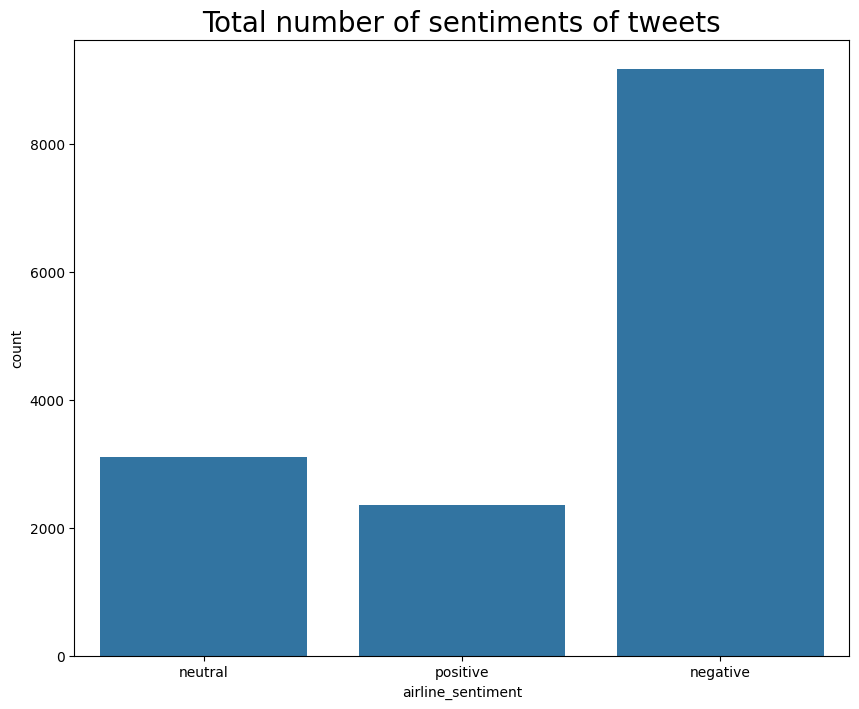

In [10]:
cprint("Total number of sentiments of tweets :",'green')
print(df.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df)
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

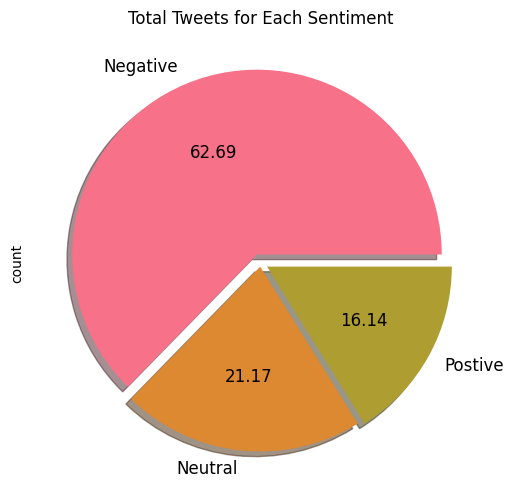

In [11]:
ax.set_title(label = 'Total number of sentiments of tweets:')
colors=sns.color_palette('husl',10)
pd.Series(df['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Neutral','Postive'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Total Tweets for Each Sentiment")

plt.show()

Text(0, 0.5, 'No.of Tweets')

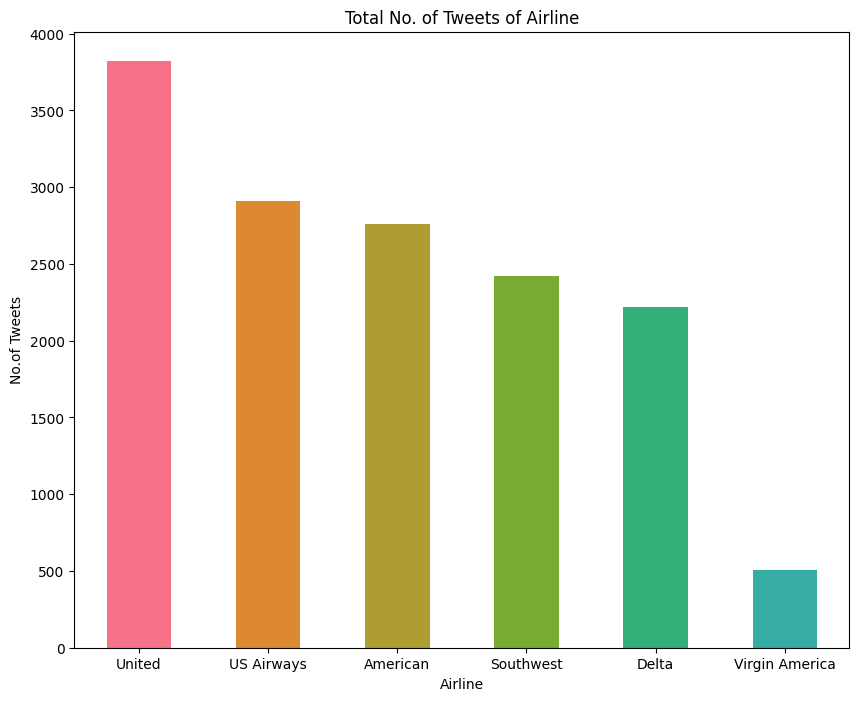

In [12]:
colors=sns.color_palette('husl',10)
pd.Series(df['airline']).value_counts().plot(kind="bar",color=colors,figsize=(10,8),fontsize=10,rot=0,title='Total No. of Tweets of Airline')
plt.xlabel('Airline',fontsize=10)
plt.ylabel('No.of Tweets',fontsize=10)

Total number of tweets for each airline :
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


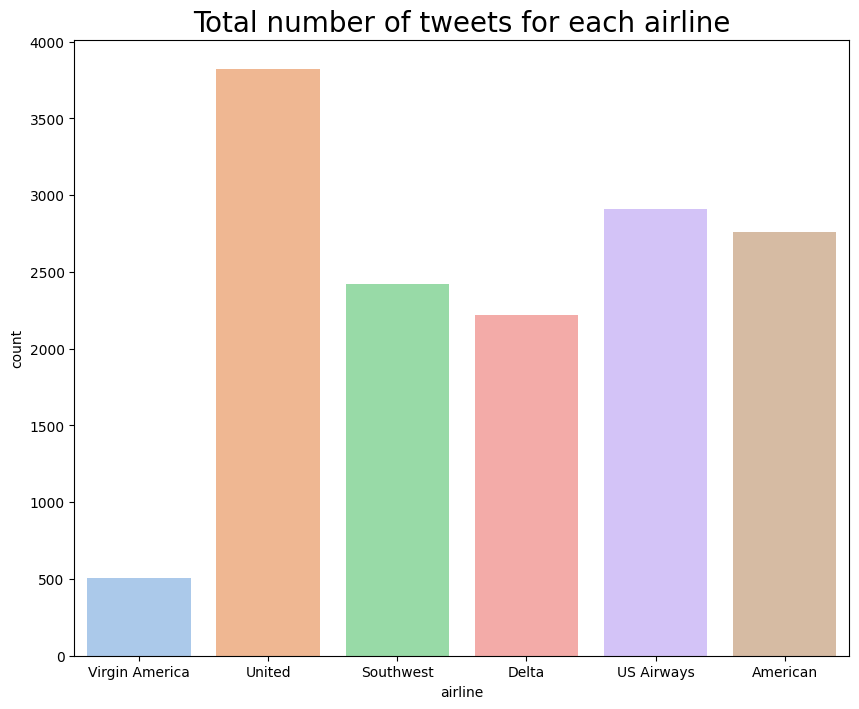

Total number of sentiment tweets for each airline :
US Airways : 
 airline_sentiment
negative    2263
neutral      381
positive     269
Name: count, dtype: int64
United : 
 airline_sentiment
negative    2633
neutral      697
positive     492
Name: count, dtype: int64
American : 
 airline_sentiment
negative    1960
neutral      463
positive     336
Name: count, dtype: int64
Southwest : 
 airline_sentiment
negative    1186
neutral      664
positive     570
Name: count, dtype: int64
Delta : 
 airline_sentiment
negative    955
neutral     723
positive    544
Name: count, dtype: int64
Virgin America : 
 airline_sentiment
negative    181
neutral     171
positive    152
Name: count, dtype: int64


In [13]:
cprint("Total number of tweets for each airline :",'green')
print(df.groupby('airline')['airline_sentiment'].count())

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 20)
plt.show()

cprint("Total number of sentiment tweets for each airline :",'green')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines :
    print('{} : \n'.format(i),df.loc[df.airline == i].airline_sentiment.value_counts())

#Now Reasons Of Negative Tweets

Reasons Of Negative Tweets :
negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


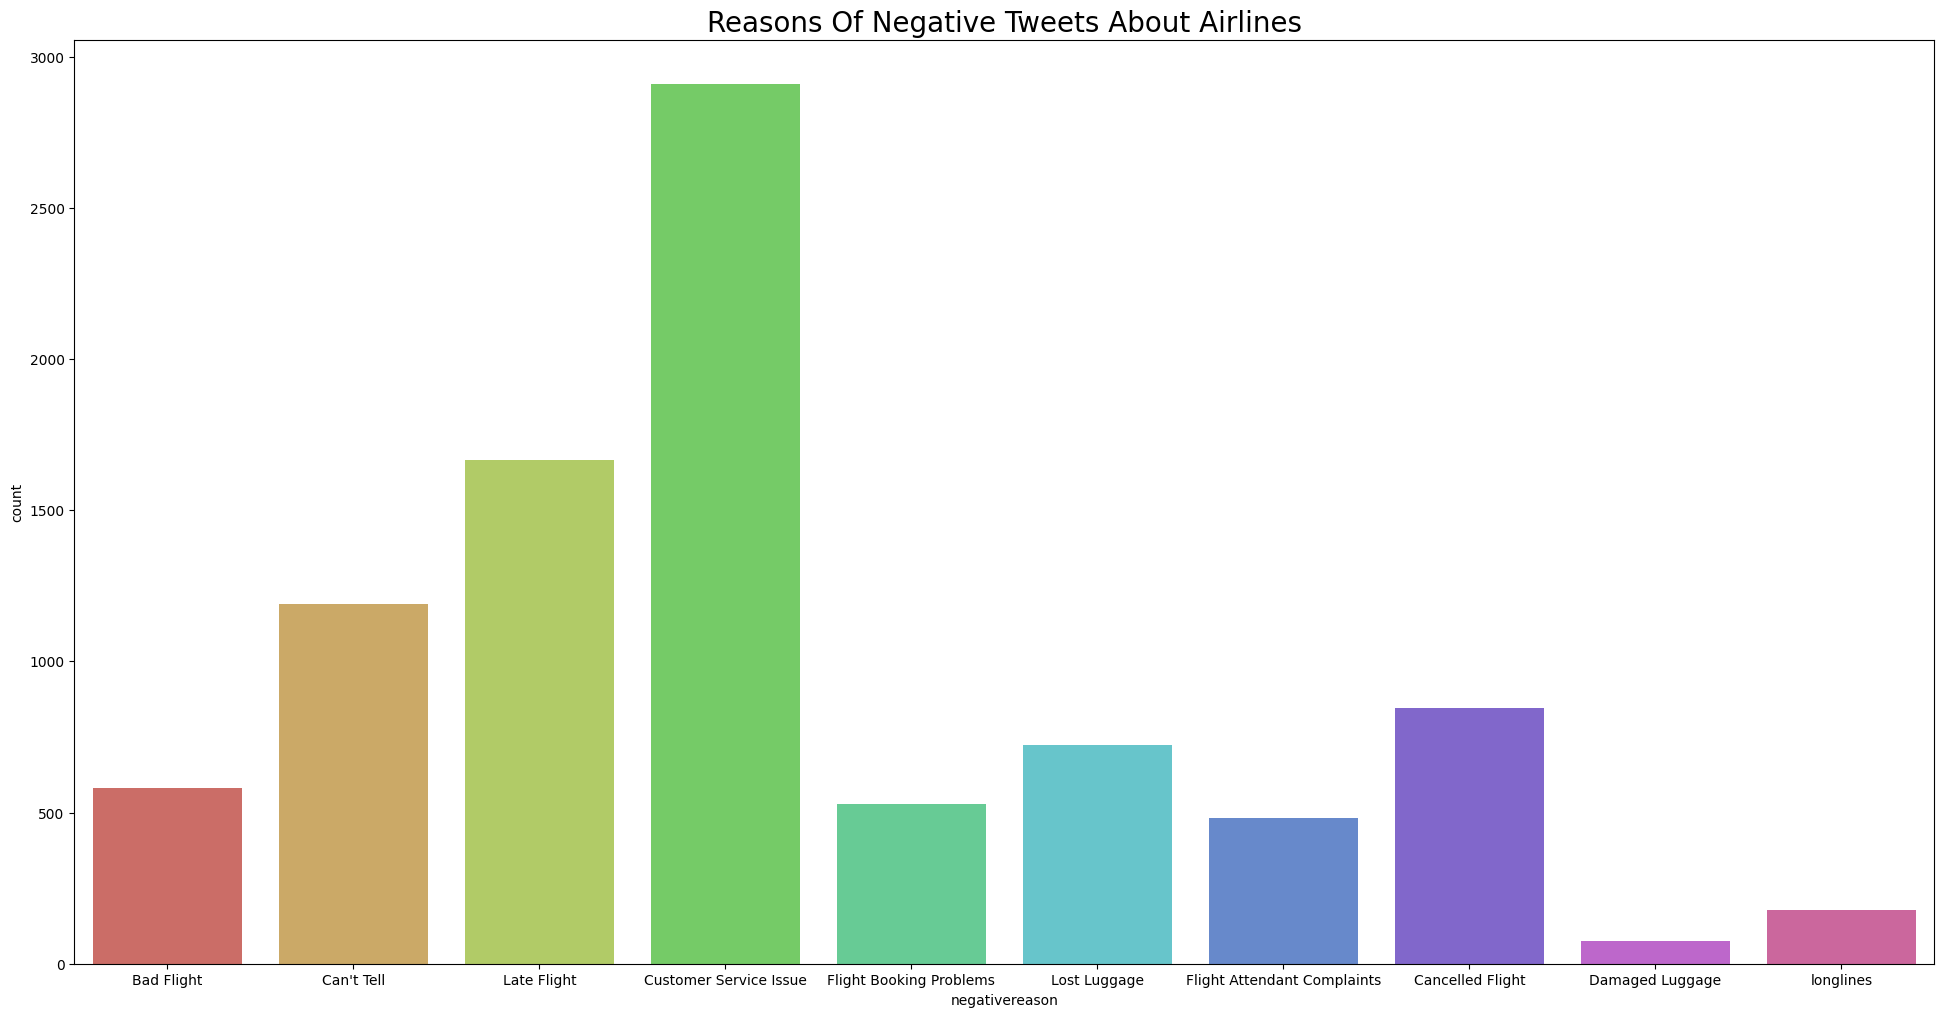

In [14]:
cprint('Reasons Of Negative Tweets :','green')
print(df.negativereason.value_counts())

plt.figure(figsize = (24, 12))
sns.countplot(x = 'negativereason', data = df, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

#Now Reasons Of Negative Tweets on Every AirLine Company

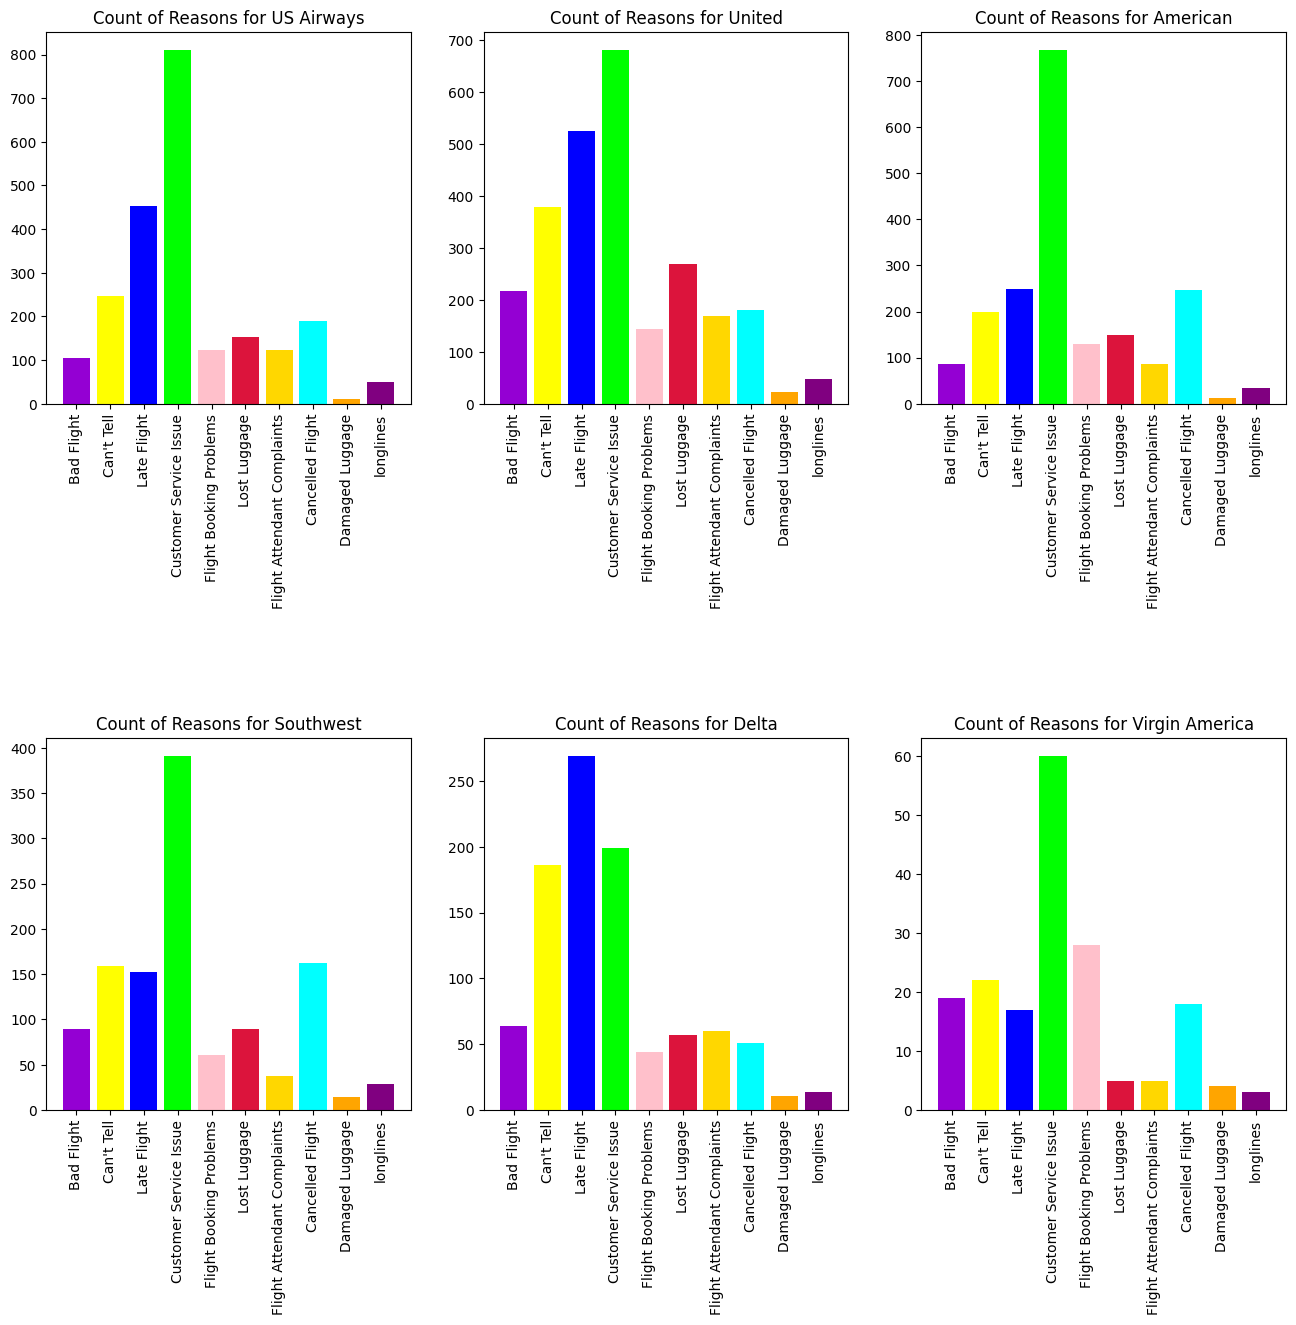

In [15]:
NR_Count=df['negativereason'].value_counts()
def NCount(Airline):
    airlineName =df[df['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= df['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def Plot_Reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)

plt.figure(2,figsize=(16, 14))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    Plot_Reason(i)

#Split Text Of Sentiments

In [16]:
positive=df[df['airline_sentiment']=='positive'].text
neutral=df[df['airline_sentiment']=='neutral'].text
negative=df[df['airline_sentiment']=='negative'].text

#Now World Cloud of Postive Sentiments

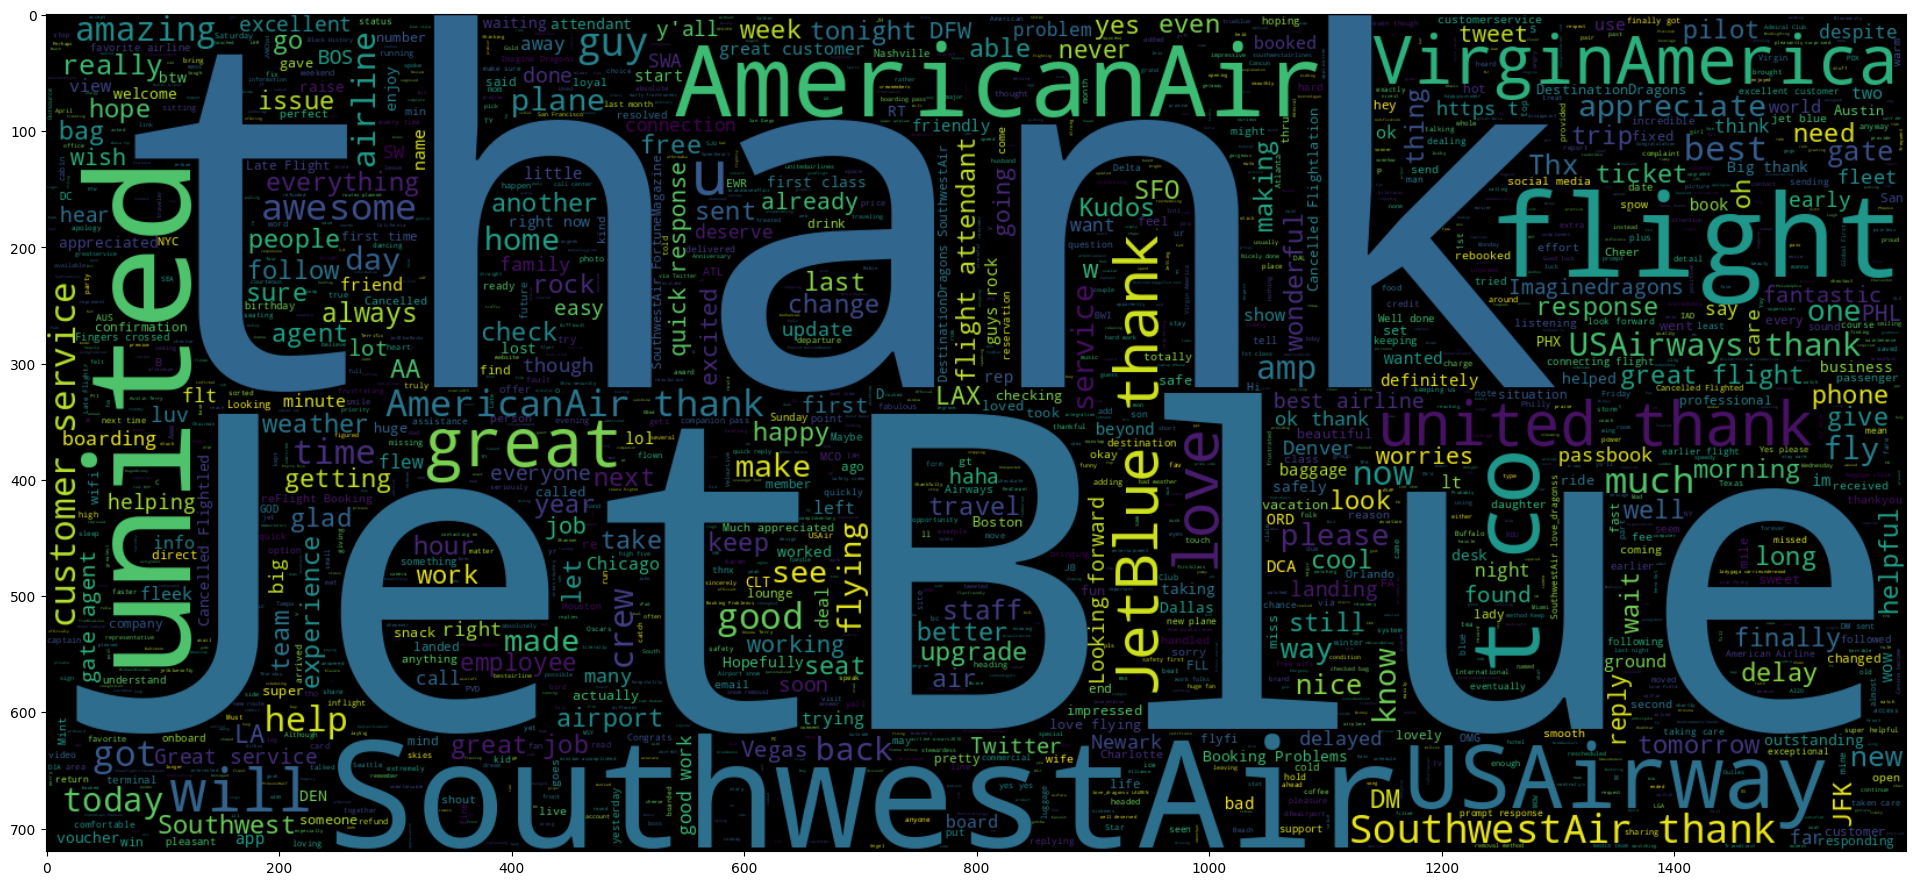

In [17]:
plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

#World could of Neutral sentiments

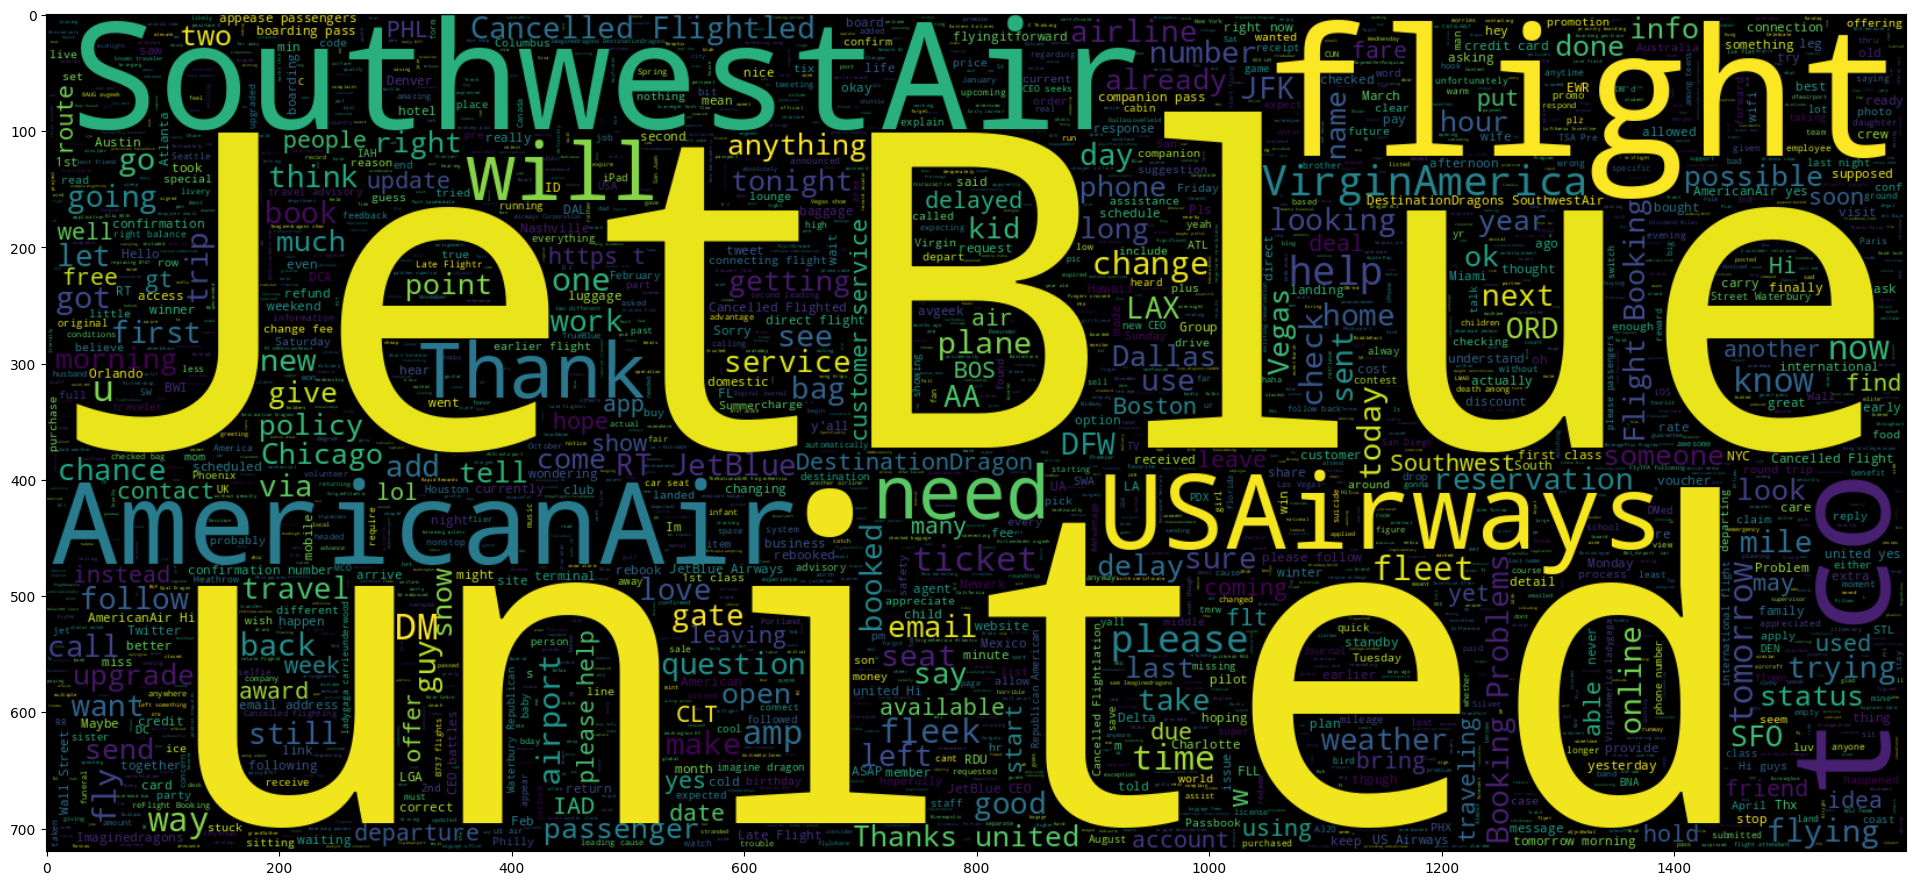

In [18]:
plt.figure(figsize=(24,12))
world_cloud_neutral=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate(" ".join(neutral))
plt.imshow(world_cloud_neutral,interpolation='bilinear')
ax.grid(False)

#World could of Negative sentiments

In [19]:
plt.figure(figsize = (24,12))
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3200 , width = 1600 , height = 720).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
ax.grid(False)

Output hidden; open in https://colab.research.google.com to view.

#TEXT PREPROCESSING AND CLEANING

In [20]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 0
    elif sentiment == "neutral":
        return 2
    elif sentiment == "negative":
        return 1

In [21]:
# Apply convert_Sentiment function
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [22]:
# Create a new DataFrame containing only positive and negative tweets
df = df[df.airline_sentiment != 2]  # Filter out neutral sentiment (sentiment value 1)

# Optionally, reset index if you want consecutive indices
df.reset_index(drop=True, inplace=True)

In [23]:
df.airline_sentiment

0        0
1        1
2        1
3        1
4        0
        ..
11536    1
11537    1
11538    0
11539    1
11540    1
Name: airline_sentiment, Length: 11541, dtype: int64

In [25]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)

    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0)

    if len(tchr) > 1:
        return tchr[0:2]

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text']


# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

In [27]:
# result
df['final_text']

0                  plus added commercials experience tacky
1        bad flight really aggressive blast obnoxious e...
2                             ca tell really big bad thing
3        ca tell seriously would pay flight seats playi...
4            yes nearly every time fly vx ear worm go away
                               ...                        
11536    cancelled flight flight cancelled flightled le...
11537                         late flight right cue delays
11538                   thank got different flight chicago
11539    customer service issue leaving minutes late fl...
11540    customer service issue money change flight ans...
Name: final_text, Length: 11541, dtype: object

In [28]:
X = df['final_text']
y = df['airline_sentiment']

In [29]:
X.shape

(11541,)

In [30]:
y.shape

(11541,)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [32]:
X_final.shape

(11541, 9660)

In [33]:
from imblearn.over_sampling import SMOTE
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [34]:
x_sm.shape

(18356, 9660)

In [35]:
X_train , X_test , y_train , y_test = train_test_split(x_sm,y_sm , test_size=0.25,random_state=42)

In [36]:
y_train_encoded = y_train
y_test_encoded = y_test

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, SpatialDropout1D, LSTM, Dense,Bidirectional,SimpleRNN
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)

# Convert NumPy array to list of strings
X_train_str = [str(text) for text in X_train]
X_test_str = [str(text) for text in X_test]

tokenizer.fit_on_texts(X_train_str)

X_train_seq = tokenizer.texts_to_sequences(X_train_str)
X_test_seq = tokenizer.texts_to_sequences(X_test_str)

In [39]:
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

In [40]:
from tensorflow.keras.layers import Dropout, Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dropout(0.2))

model.add(Dense(units=2, activation='softmax'))

In [41]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
epochs = 10
model.fit(X_train_padded, y_train_encoded, epochs=epochs, validation_data=(X_test_padded, y_test_encoded))

Epoch 1/10
431/431 [==============================] - 252s 567ms/step - loss: 0.1229 - accuracy: 0.9489 - val_loss: 0.0220 - val_accuracy: 0.9946
Epoch 2/10
431/431 [==============================] - 250s 581ms/step - loss: 0.0218 - accuracy: 0.9952 - val_loss: 0.0197 - val_accuracy: 0.9963
Epoch 3/10
431/431 [==============================] - 254s 589ms/step - loss: 0.0213 - accuracy: 0.9941 - val_loss: 0.0183 - val_accuracy: 0.9965
Epoch 4/10
431/431 [==============================] - 246s 571ms/step - loss: 0.0195 - accuracy: 0.9952 - val_loss: 0.0165 - val_accuracy: 0.9963
Epoch 5/10
431/431 [==============================] - 251s 582ms/step - loss: 0.0133 - accuracy: 0.9961 - val_loss: 0.0227 - val_accuracy: 0.9952
Epoch 6/10
431/431 [==============================] - 250s 580ms/step - loss: 0.0110 - accuracy: 0.9972 - val_loss: 0.0222 - val_accuracy: 0.9946
Epoch 7/10
431/431 [==============================] - 245s 567ms/step - loss: 0.0084 - accuracy: 0.9977 - val_loss: 0.0249 -

In [43]:
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Predictions
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test_encoded, y_pred_classes)
print("Classification Report:")
print(class_report)

144/144 [==============================] - 11s 76ms/step - loss: 0.0200 - accuracy: 0.9946
Test Loss: 0.020009923726320267, Test Accuracy: 0.9945521950721741
144/144 [==============================] - 11s 72ms/step
Confusion Matrix:
[[2264    9]
 [  16 2300]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2273
           1       1.00      0.99      0.99      2316

    accuracy                           0.99      4589
   macro avg       0.99      0.99      0.99      4589
weighted avg       0.99      0.99      0.99      4589

